# Task 7 - Develop A Neural Network That can Read Handwriting

***Dataset :*** https://en.wikipedia.org/wiki/MNIST_database

***Problem Statement :***

<img src="Screenshot 2023-03-30 114956.png" width="500">

### Import all thr necessary Libraries

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

### Load Dataste

In [2]:
data = tf.keras.datasets.mnist

### Dividing the images and their outputs

In [3]:
(x_train, y_train), (x_test, y_test) = data.load_data()

### Cheking the data set images

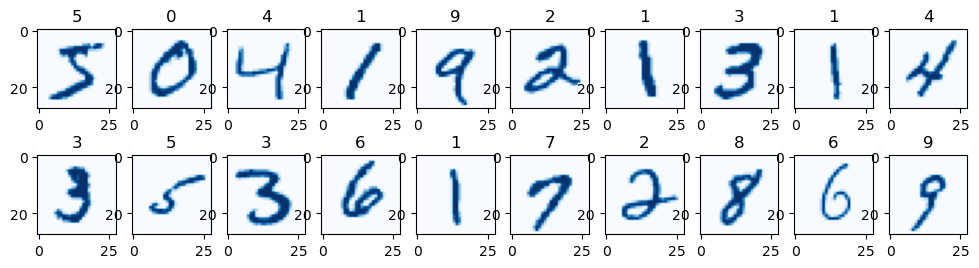

In [4]:
fig = plt.figure(figsize = (12, 3))

for i in range(20):
  ax = fig.add_subplot(2, 10, i+1)
  ax.imshow(np.squeeze(x_train[i]), cmap = 'Blues')
  ax.set_title(y_train[i])

### Convert the data images into metrics form

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Normalizing the matrix array

In [7]:
X_train = x_train / 255.0
X_test = x_test / 255.0

### Flattening the two-dimensional array into one dimensional array or a single column

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                                    tf.keras.layers.Dense(128, activation = 'relu'),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Using of AdamOptimizer

In [10]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

### Fitting the model for 5 iteration 

In [11]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2609 - accuracy: 0.9253
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1166 - accuracy: 0.9651
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0790 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0592 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0454 - accuracy: 0.9863


***Observation :***
- 98% Accuracy achieved with 5 iterations

### Fitting the model for 9 iterations

In [12]:
model.fit(X_train, y_train, epochs = 9)

Epoch 1/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0372 - accuracy: 0.9883
Epoch 2/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0277 - accuracy: 0.9912
Epoch 3/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0234 - accuracy: 0.9925
Epoch 4/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0195 - accuracy: 0.9938
Epoch 5/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0157 - accuracy: 0.9954
Epoch 6/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0140 - accuracy: 0.9957
Epoch 7/9
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0114 - accuracy: 0.9964
Epoch 8/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0097 - accuracy: 0.9972
Epoch 9/9
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0083 - accuracy: 0.9974


***Observation :***

- 99% Accuracy achieved with 9 iterations    

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 22.7865 - accuracy: 0.9764


[22.786508560180664, 0.9764000177383423]

***Observation :***

- 97% of total accuracy of our neural network has been achieved

In [14]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.1)

Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 5.3787 - accuracy: 0.9889 - val_loss: 1.5796 - val_accuracy: 0.9952
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 1.7268 - accuracy: 0.9945 - val_loss: 2.7751 - val_accuracy: 0.9925
Epoch 3/10
1688/1688 [==============================] - 9s 6ms/step - loss: 1.9075 - accuracy: 0.9944 - val_loss: 2.2367 - val_accuracy: 0.9933
Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 1.9288 - accuracy: 0.9941 - val_loss: 2.6078 - val_accuracy: 0.9940
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 1.8502 - accuracy: 0.9947 - val_loss: 2.8154 - val_accuracy: 0.9937
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 1.4771 - accuracy: 0.9958 - val_loss: 4.3184 - val_accuracy: 0.9912
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 1.8613 - accuracy: 0.9947 - val_loss: 2.3319 - val_accuracy:

### Plotting Accuracy of Model

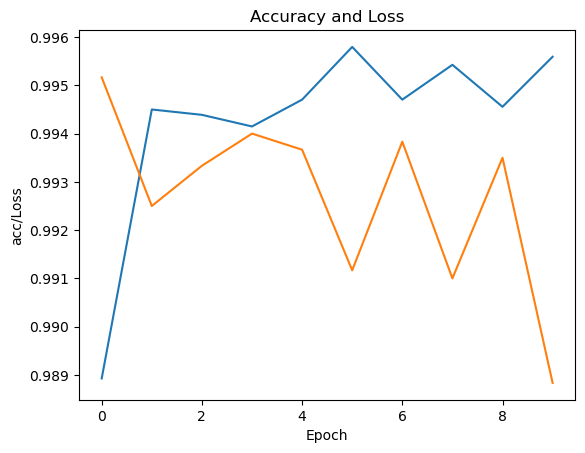

In [15]:
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history["val_accuracy"], label = 'val')
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.show()

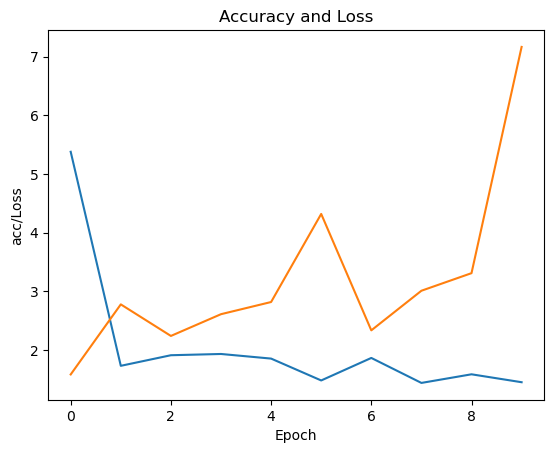

In [16]:
plt.plot(history.history['loss'], label = 'acc')
plt.plot(history.history["val_loss"], label = 'val')
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.show()

### Testing Model

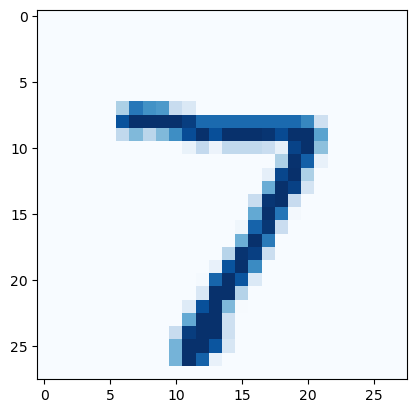

In [17]:
plt.imshow(np.squeeze(x_test[0]), cmap = "Blues")

In [18]:
prediction = model.predict(x_test)
np.argmax(prediction[0])

313/313 [==============================] - 1s 3ms/step


7

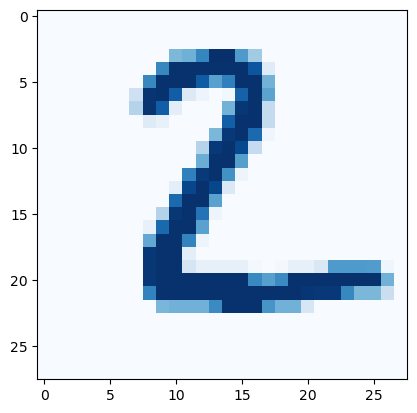

In [19]:
plt.imshow(np.squeeze(x_test[1]), cmap = "Blues")

In [20]:
prediction = model.predict(x_test)
np.argmax(prediction[1])

313/313 [==============================] - 1s 3ms/step


2